In [2]:
from src.utils.data import extract_all_GRACE_data

time_dependent_maps, lat, lon, times = extract_all_GRACE_data()

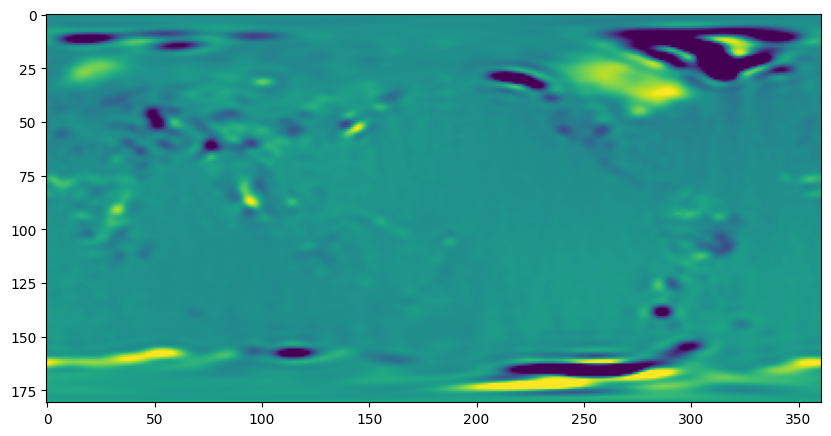

In [3]:
from src.functions import signal_trend
from matplotlib.pyplot import imshow, figure
from numpy import minimum, maximum

figure(figsize=(10, 20))
imshow(
    maximum(
        -50.0,
        minimum(
            50.0,
            [
                [signal_trend(trend_dates=times, signal=time_serie)[0] for time_serie in time_series]
                for time_series in time_dependent_maps.transpose([1, 2, 0])
            ],
        ),
    )
)

In [4]:
from src.utils.seismic_fit.utils import remove_earthquakes

fitted_parameters_per_area, corrected_time_dependent_maps = remove_earthquakes(
    time_dependent_maps=time_dependent_maps,
    times=times,
    lat=lat,
    lon=lon,
)

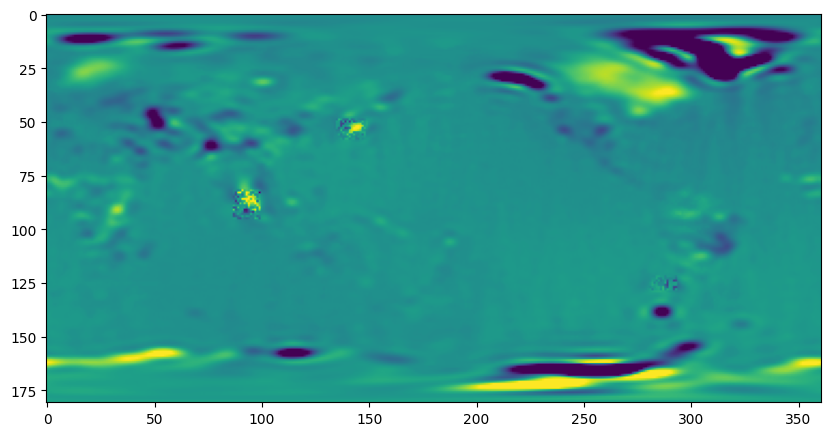

In [5]:
from src.functions import signal_trend
from matplotlib.pyplot import imshow, figure
from numpy import minimum, maximum

figure(figsize=(10, 20))
imshow(
    maximum(
        -50.0,
        minimum(
            50.0,
            [
                [signal_trend(trend_dates=times, signal=time_serie)[0] for time_serie in time_series]
                for time_series in corrected_time_dependent_maps.transpose([1, 2, 0])
            ],
        ),
    )
)

IndexError: list index out of range

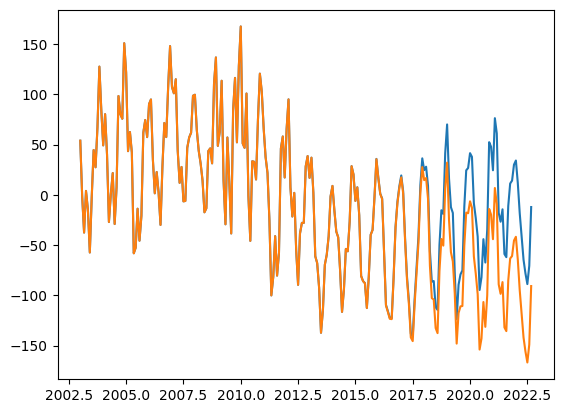

In [8]:
from matplotlib.pyplot import plot
from numpy import where
from src.utils.seismic_fit.utils import full_earthquake_signal

for latitude_index, fitted_parameters_line in zip(
    where(fitted_parameters_per_area["Tohoku"]["latitudes"])[0], fitted_parameters_per_area["Tohoku"]["fitted_parameters"]
):
    for longitude_index, fitted_parameters in zip(
        where(fitted_parameters_per_area["Tohoku"]["longitudes"])[0], fitted_parameters_line
    ):
        figure()
        plot(times, time_dependent_maps[:, latitude_index, longitude_index])
        plot(times, corrected_time_dependent_maps[:, latitude_index, longitude_index])
        plot(
            times,
            full_earthquake_signal(t=times, parameters=fitted_parameters),
        )